# Dataset generation from the Tallo and Neon datasets dataset

## Neon dataset:
Downloaded on 04/07/2023:
https://github.com/weecology/NeonSpeciesBenchmark/tree/main/data/raw/neon_vst_data_2022.csv

## Tallo database:
Downloaded on 04/07/2023:
https://zenodo.org/record/6637599
https://onlinelibrary.wiley.com/doi/full/10.1111/gcb.16302


In [48]:
import pandas as pd

neon_colour = '#AD67E4'
tallo_colour = '#B8E467'

data_dir = '../data/to_publish/'
fig_dir = f'{data_dir}figs/'
# Read in Tallo and Neon
tallo_df = pd.read_csv(f'{data_dir}raw/Tallo.csv')
neon_df = pd.read_csv(f'{data_dir}raw/neon_vst_data_2022.csv')
print(len(tallo_df), len(neon_df))

498838 100628


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_83431/4221105779.py:10: DtypeWarning: Columns (34,35,40,41,42,47) have mixed types. Specify dtype option on import or set low_memory=False.
  neon_df = pd.read_csv(f'{data_dir}raw/neon_vst_data_2022.csv')


# Update Neon to use same species labels

## Convert species to standard names as those used in Tallo

Use the taxonstand paper as in the Tallo paper: https://cran.r-project.org/web/packages/Taxonstand/index.html

```
install.packages("Taxonstand")
library(Taxonstand)
species <- read.csv('../data/harvard/species_list.csv')
species_list <- unlist(species[[1]])
species_list[1]
renamed_species <- TPL(species_list)
write.csv(renamed_species, '../data/harvard/species_list_renamed.csv')
```

In [49]:
from remseno import *

u = SciUtil()
# Print species names
u.dp(['Tallo species'])
print(tallo_df['species'].value_counts())

# Neon uses a different species labelling so we need to update this
u.dp(['Neon species'])
print(neon_df['scientificName'].value_counts())

# use https://cran.r-project.org/web/packages/Taxonstand/Taxonstand.pdf to convert to the plants
species_list = list(set(neon_df['scientificName'].values))
with open(f'{data_dir}species_list.csv', 'w+') as fout:
    for s in species_list:
        fout.write(f'{s}\n')

--------------------------------------------------------------------------------
                                 Tallo species	                                 
--------------------------------------------------------------------------------
species
Quercus ilex               22760
Pinus sylvestris           18221
Pinus halepensis           14003
Pinus pinaster             11766
Quercus infectoria         10964
                           ...  
Lithocarpus orocola            1
Decaspermum parviflorum        1
Terminalia foetidissima        1
Syzygium fastigiatum           1
Tarenna mollis                 1
Name: count, Length: 5163, dtype: int64
--------------------------------------------------------------------------------
                                 Neon species	                                  
--------------------------------------------------------------------------------
scientificName
Acer rubrum L.                                      9564
Tsuga canadensis (L.) Carrière 

## Update the species based on the ones we got in R



In [50]:
# Read in the updated species list
species_df = pd.read_csv('../data/harvard/species_list_renamed.csv', index_col=0)
# Join the two dataframes as in update the species lists in the NEON dataframe
genera = species_df['Genus'].values
species_df['species'] = [f'{genera[i]} {s.lower()}' for i, s in enumerate(species_df['Species'].values)]
species_df['species'].value_counts()
label_to_species = dict(zip(species_df.Taxon, species_df.species))
label_to_genus = dict(zip(species_df.Taxon, species_df.Genus))
label_to_family = dict(zip(species_df.Taxon, species_df.Family))
# Also need to do some data processing since the lat and long are annoying!
neon_df['longitude'] = [float(x.split("(")[1].split(",")[0]) for x in neon_df['geometry'].values]
neon_df['latitude'] = [float(x.split(" ")[1].split(")")[0])for x in neon_df['geometry'].values]
neon_df['species'] = [label_to_species.get(s) for s in neon_df['scientificName'].values]
neon_df['genera'] = [label_to_genus.get(s) for s in neon_df['scientificName'].values]
neon_df['family'] = [label_to_family.get(s) for s in neon_df['scientificName'].values]
neon_df

,Unnamed: 0,uid.x,individualID,eventID,tagStatus,growthForm,plantStatus,stemDiameter,measurementHeight,height,...,elevation,vertUncert,nlcdClass,appMods,geometry,itcEasting,itcNorthing,species,genera,family
0,1,59702b01-0649-4b0a-88a6-119a9c0f8d49,NEON.PLA.D01.BART.05273,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",10.3,130.0,11.5,...,293.61,0.18,deciduousForest,bbc|cdw|cfc|dhp|hbp|vst,"c(-71.282966, 44.061595)",317149.133289,4.881250e+06,Fagus grandifolia,Fagus,Fagaceae
1,4,074ab6c5-ca6b-4b63-aa1d-8dd9ea434785,NEON.PLA.D01.BART.05415,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",12.5,130.0,10.4,...,306.95,0.23,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284075, 44.061045)",317053.946812,4.881177e+06,Fagus grandifolia,Fagus,Fagaceae
2,7,d6eeaa5d-b8f1-4776-8b8e-8e53b62e7c9b,NEON.PLA.D01.BART.05091,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",25.8,130.0,16.3,...,303.74,0.20,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284574, 44.06103)",317027.907817,4.881194e+06,Fagus grandifolia,Fagus,Fagaceae
3,8,ae20ee4d-8647-49bf-b32d-5c966bf10700,NEON.PLA.D01.BART.05405,vst_BART_2015,NaN,single bole tree,"Live, disease damaged",21.5,130.0,14.3,...,299.60,0.15,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284581, 44.061221)",317035.949748,4.881202e+06,Fagus grandifolia,Fagus,Fagaceae
4,10,5a538e10-fac0-446f-a2f8-e7bbb3a798f0,NEON.PLA.D01.BART.05289,vst_BART_2015,NaN,single bole tree,Live,36.4,130.0,18.5,...,303.74,0.20,deciduousForest,bbc|cdw|cfc|dhp|hbp|ltr|vst,"c(-71.284574, 44.06103)",317026.280295,4.881190e+06,Acer rubrum,Acer,Sapindaceae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100623,367001,975891e4-2477-48d8-8ff8-7064cf22e426,NEON.PLA.D20.PUUM.03291,vst_PUUM_2020,ok,single bole tree,"Dead, broken bole",27.3,190.0,9.8,...,1126.13,0.22,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233375, 19.555083)",265675.870835,2.163772e+06,nan plant,NaN,NaN
100624,367002,9bb81c10-c504-40d4-ad5a-71f2dd30920c,NEON.PLA.D20.PUUM.03339,vst_PUUM_2020,ok,single bole tree,Live,19.5,180.0,17.8,...,1126.13,0.22,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233375, 19.555083)",265681.075200,2.163775e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae
100625,367003,33895dcf-85c5-469e-928c-cc50e38ddb13,NEON.PLA.D20.PUUM.03289,vst_PUUM_2020,ok,single bole tree,Standing dead,21.8,130.0,10.8,...,1128.00,0.28,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233462, 19.554987)",265684.577390,2.163763e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae
100626,367005,159ba210-d5ba-4278-abfd-182019c519e8,NEON.PLA.D20.PUUM.03330,vst_PUUM_2020,ok,single bole tree,Live,29.1,210.0,20.1,...,1128.00,0.28,evergreenForest,cdw|cfc|dhp|hbp|vst,"c(-155.233462, 19.554987)",265677.401007,2.163771e+06,Metrosideros polymorpha,Metrosideros,Myrtaceae


## Plot both datasets around the world

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_83431/2890893391.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


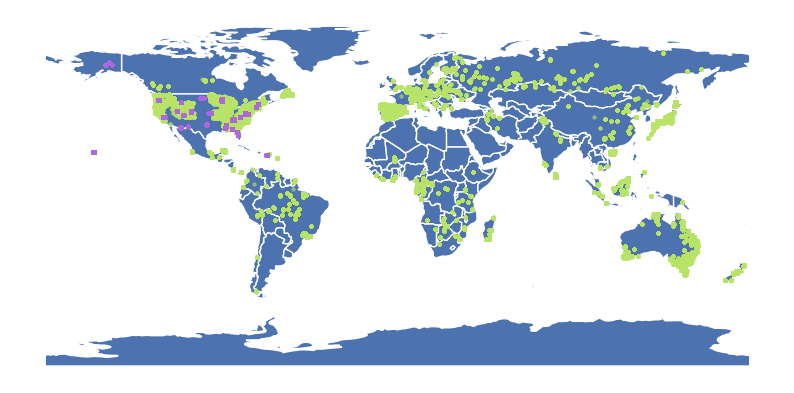

In [51]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(tallo_df['longitude'], tallo_df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5, alpha=0.5)

geometry = [Point(xy) for xy in zip(neon_df['longitude'], neon_df['latitude'])]
gdf = GeoDataFrame(neon_df, geometry=geometry)   

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5, alpha=0.5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_all_data_map.svg')

## Filter for shared species since that's all we'll be able to look at anyway


--------------------------------------------------------------------------------
                          Tallo shared species,	64907	                          
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                          NEON shared species,	87572	                           
--------------------------------------------------------------------------------


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_83431/2195974927.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


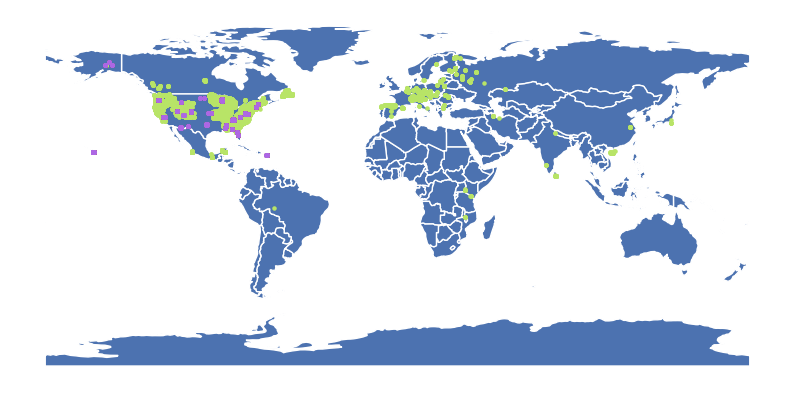

In [52]:
# Filter to only include species in NEON
shared_species = set(list(species_df['species'].values)) & set(list(tallo_df['species'].values))

tallo_df = tallo_df[tallo_df['species'].isin(shared_species)]
u.dp(['Tallo shared species,', len(tallo_df)])

neon_df = neon_df[neon_df['species'].isin(shared_species)]
u.dp(['NEON shared species,', len(neon_df)])

geometry = [Point(xy) for xy in zip(tallo_df['longitude'], tallo_df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5)

geometry = [Point(xy) for xy in zip(neon_df['longitude'], neon_df['latitude'])]
gdf = GeoDataFrame(neon_df, geometry=geometry)   

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_shared_species_map.svg')

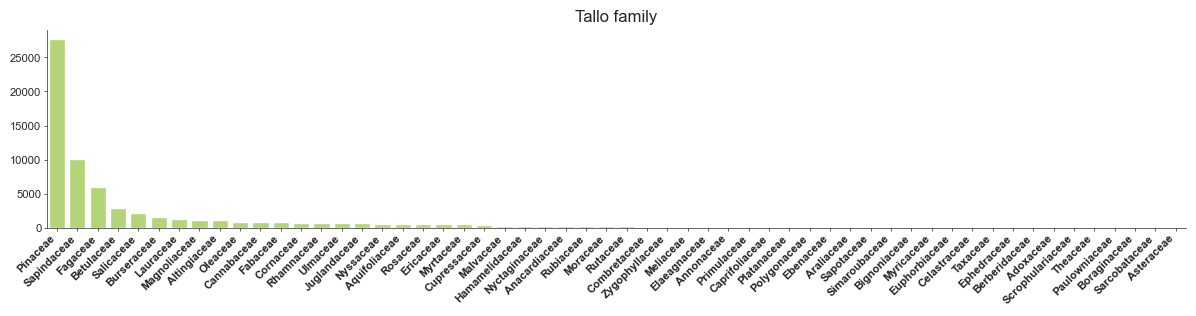

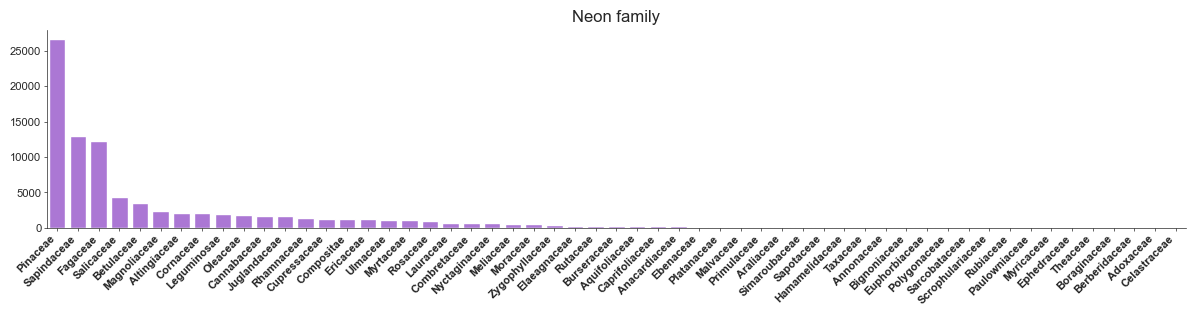

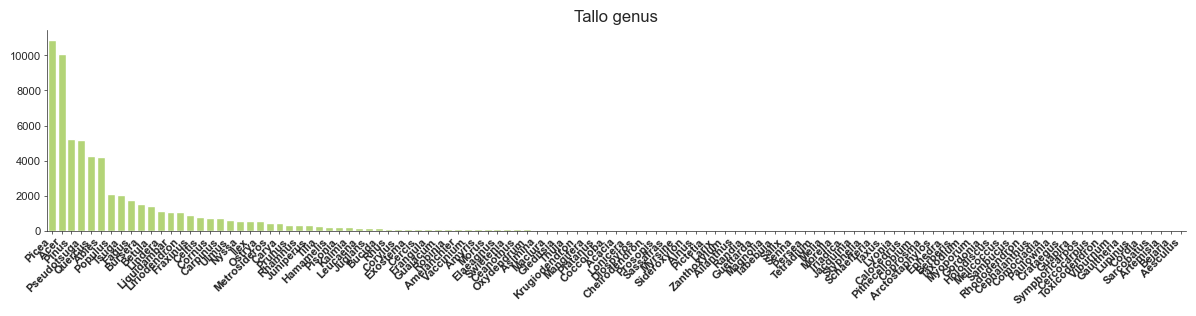

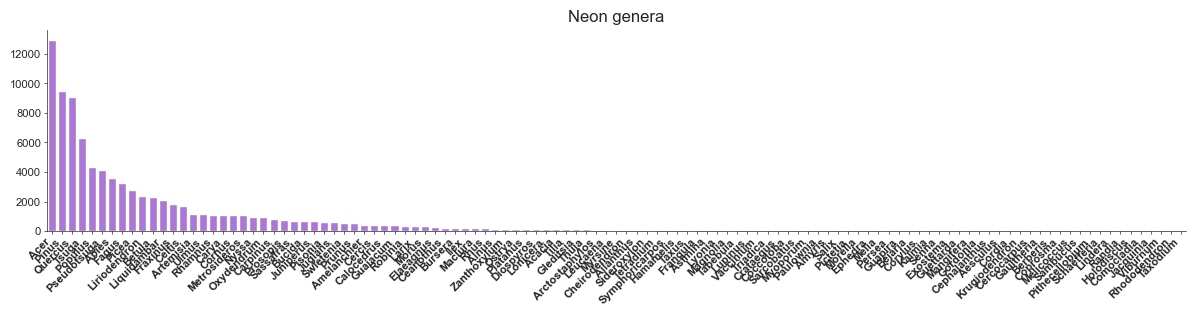

In [53]:
# Make plots from both datasets about the number of species etc
from sciviso import *

neon_config = {'palette': [neon_colour]}
tallo_config = {'palette': [tallo_colour]}

c = Countplot(tallo_df, x='family', figsize=(12, 3), config=tallo_config)
c.plot()
plt.title('Tallo family')
plt.savefig(f'{fig_dir}Figure1_tallo_family_shared_species.svg')
plt.show()

c = Countplot(neon_df, x='family', figsize=(12, 3), config=neon_config)
c.plot()
plt.title('Neon family')
plt.savefig(f'{fig_dir}Figure1_neon_family_shared_species.svg')
plt.show()

c = Countplot(tallo_df, x='genus', figsize=(12, 3), config=tallo_config)
c.plot()
plt.title('Tallo genus')
plt.savefig(f'{fig_dir}Figure1_tallo_genus_shared_species.svg')
plt.show()

c = Countplot(neon_df, x='genera', figsize=(12, 3), config=neon_config)
c.plot()
plt.title('Neon genera')
plt.savefig(f'{fig_dir}Figure1_neon_genus_shared_species.svg')
plt.show()

# Get shared species with > 1 in each dataset 

--------------------------------------------------------------------------------
                          Tallo shared species,	54482	                          
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                          NEON shared species,	76289	                           
--------------------------------------------------------------------------------


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_83431/1485554657.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


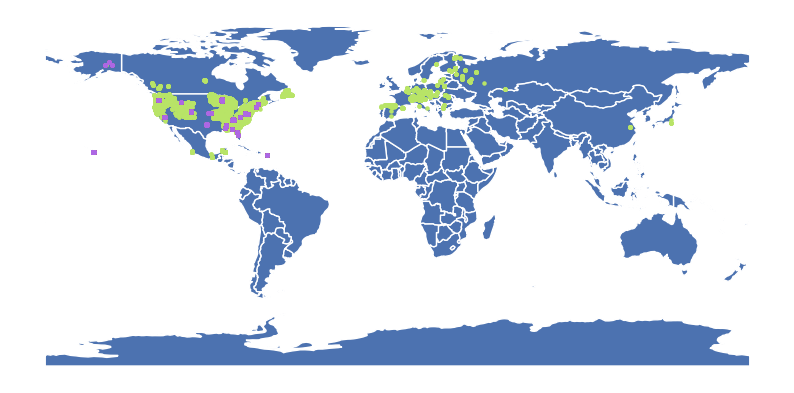

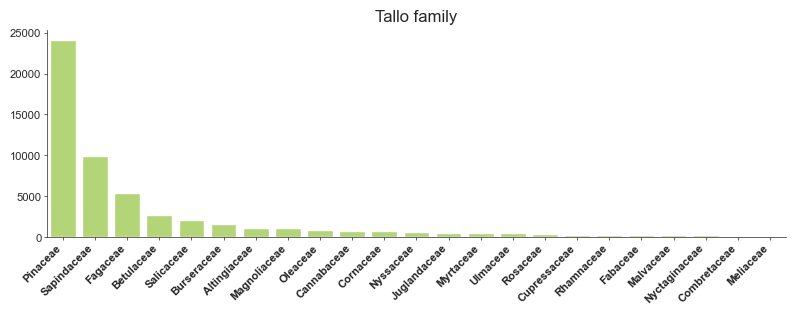

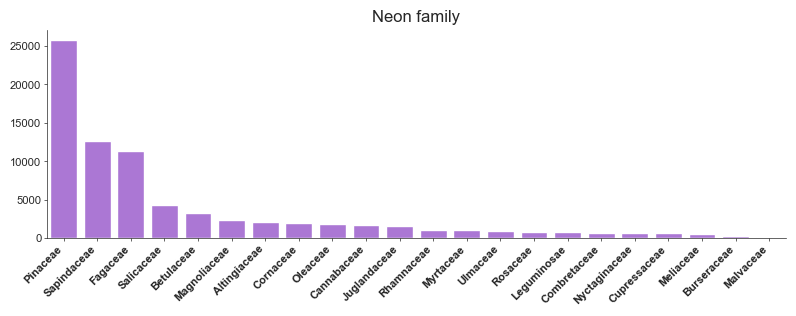

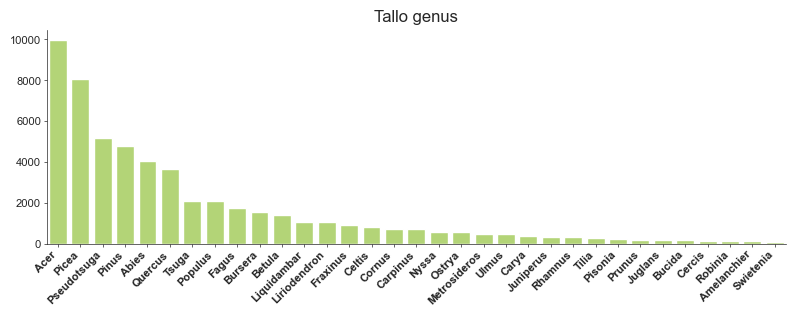

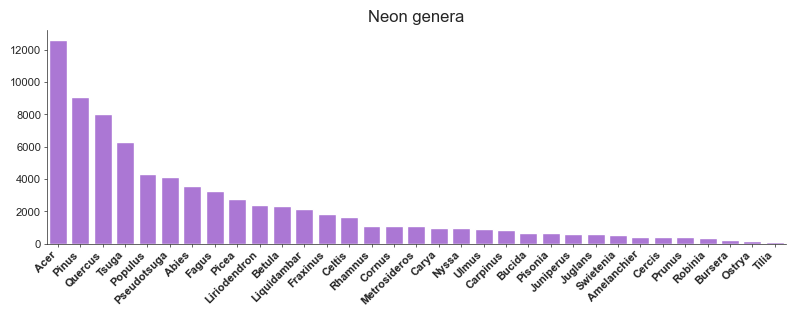

In [54]:
shared_extra_species = []
count = 100
for species in shared_species:
    if len(tallo_df[tallo_df['species'] == species]) > count and len(neon_df[neon_df['species'] == species]) > count:
        shared_extra_species.append(species)
        
# Filter to only include species in NEON
tallo_df = tallo_df[tallo_df['species'].isin(shared_extra_species)]
u.dp(['Tallo shared species,', len(tallo_df)])

neon_df = neon_df[neon_df['species'].isin(shared_extra_species)]
u.dp(['NEON shared species,', len(neon_df)])

geometry = [Point(xy) for xy in zip(tallo_df['longitude'], tallo_df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5)

geometry = [Point(xy) for xy in zip(neon_df['longitude'], neon_df['latitude'])]
gdf = GeoDataFrame(neon_df, geometry=geometry)   

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_shared_many_species_map.svg')
plt.show()

c = Countplot(tallo_df, x='family', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('Tallo family')
plt.savefig(f'{fig_dir}Figure1_tallo_family_shared_many_species.svg')
plt.show()

c = Countplot(neon_df, x='family', figsize=(8, 3), config=neon_config)
c.plot()
plt.title('Neon family')
plt.savefig(f'{fig_dir}Figure1_neon_family_shared_many_species.svg')
plt.show()

c = Countplot(tallo_df, x='genus', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('Tallo genus')
plt.savefig(f'{fig_dir}Figure1_tallo_genus_shared_many_species.svg')
plt.show()

c = Countplot(neon_df, x='genera', figsize=(8, 3), config=neon_config)
c.plot()
plt.title('Neon genera')
plt.savefig(f'{fig_dir}Figure1_neon_genus_shared_many_species.svg')
plt.show()

## For both Tallo and Neon group by location and identify image IDs from planet scope

As we're interested in identifying shared locations/unique locations group each by the location i.e. lat and long.

We need to do this for both Tallo and NEON.


# Do the same for Tallo, namely group the regions based on lat and lon

Then identify a bounding box for running the planetscope selection

In [59]:
grped = tallo_df.groupby(['latitude', 'longitude'])
location_map = {}

for location, values in grped:
    location_map[location] = {}
    family = {}
    genus = {}
    species = {}
    division = {}
    loc_size = len(values)
    for f in set(values['family'].values):
        family[f] = len(values['family']==f)/loc_size
    for f in set(values['genus'].values):
        genus[f] = len(values['genus']==f)/loc_size
    for f in set(values['species'].values):
        species[f] = len(values['species']==f)/loc_size
    for f in set(values['division'].values):
        division[f] = len(values['division']==f)/loc_size
    location_map[location]['size'] = loc_size
    location_map[location]['division'] = division
    location_map[location]['family'] = family
    location_map[location]['genus'] = genus
    location_map[location]['species'] = species

In [60]:
# Calculate the number of places which have different numbers...
homo = []
hetro = []

for loc, location in location_map.items():
    if len(location['species']) == 1:
        homo += [c for c in location['species']] # i.e. add in the species
    else:
        hetro.append(loc)
u.dp(['Tallo species variety,', 'single:', len(homo), 'multiple:', len(hetro)])

tallo_df = tallo_df[tallo_df['species'].isin(homo)]
u.dp(['Tallo homo species,', len(tallo_df)])

tallo_df = tallo_df.groupby(['latitude', 'longitude']).agg({'tree_id': 'first', 
                                                         'division': 'first',
                                                         'family': 'first',
                                                         'genus': 'first', 
                                                         'species': 'first',
                                                         'stem_diameter_cm': lambda x: x.mean(skipna=True),
                                                         'height_m': lambda x: x.mean(skipna=True),
                                                         'crown_radius_m': lambda x: x.mean(skipna=True)})

u.dp(['Tallo grouped by location:', len(tallo_df)])


--------------------------------------------------------------------------------
              Tallo species variety,	single:	1183	multiple:	1366	               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                           Tallo homo species,	50855	                           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                        Tallo grouped by location:	2549	                        
--------------------------------------------------------------------------------


In [13]:
print(tallo_df.division.value_counts())
print(tallo_df.family.value_counts())
print(tallo_df.genus.value_counts())
print(tallo_df.species.value_counts())
tallo_df.to_csv(f'{data_dir}tallo_grouped_locations.csv')

division
Angiosperm    1563
Gymnosperm     986
Name: count, dtype: int64
family
Pinaceae         970
Fagaceae         436
Sapindaceae      247
Burseraceae      172
Salicaceae        93
Altingiaceae      84
Oleaceae          82
Magnoliaceae      76
Betulaceae        69
Fabaceae          55
Juglandaceae      46
Cornaceae         42
Ulmaceae          34
Cannabaceae       30
Nyssaceae         22
Myrtaceae         20
Rosaceae          19
Nyctaginaceae     17
Cupressaceae      16
Rhamnaceae         8
Malvaceae          7
Meliaceae          4
Name: count, dtype: int64
genus
Quercus         387
Picea           300
Pinus           292
Acer            247
Abies           193
Bursera         172
Pseudotsuga     123
Populus          93
Liquidambar      84
Fraxinus         82
Liriodendron     76
Tsuga            62
Robinia          55
Fagus            49
Betula           42
Cornus           42
Carya            38
Ulmus            34
Celtis           30
Carpinus         27
Nyssa            22
Metros

# Data download section 

1. Create a bounding box and identify images from planetscope that fall within this area
2. Download the "best" one

In [14]:
import pandas as pd

c = Coords(f'{data_dir}tallo_grouped_locations.csv', x_col='longitude', y_col='latitude', label_col='division',
                   id_col='tree_id', sep=',', class1='Angiosperm', class2='Gymnosperm', crs='EPSG:4326')
df = c.df
ys = df['latitude'].values
bbs = []
meters = 500
for i, x in enumerate(df['longitude'].values):
    bbs.append(c.build_polygon_from_centre_point(x, ys[i], meters, meters, crs='EPSG:4326'))
polygons = []
x0, x1, y0, y1 = [], [], [], []
for bs in bbs:
    cs = []
    for b in bs:
        cs.append([b[0], b[1]])
    polygons.append(cs)
    x0.append(min([x[1] for x in cs]))
    x1.append(max([x[1] for x in cs]))
    y0.append(min([x[0] for x in cs]))
    y1.append(max([x[0] for x in cs]))
df['x0'] = x0
df['x1'] = x1
df['y0'] = y0
df['y1'] = y1

image_ids = []
tree_ids = df['tree_id'].values
# We want to get from summer 2022 
labels = ['summer_2022']
for xi, x in enumerate([summer_2022]):
    for i in tqdm(range(0, len(polygons))):
        try:
            image_ids.append(select_image_ids(f'{data_dir}tree_files/{labels[xi]}_{tree_ids[i]}.csv', polygons[i], x,
                                          max_cloud_cover=0.1, visible_percent=95))
        except:
            image_ids.append(None)


--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.	Angiosperm	Gymnosperm	 in column:	division	Your dataset origionally had:	2549	
Now you have:	2549	
--------------------------------------------------------------------------------


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr


 1

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr


 2

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 3

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 4

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 5

ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr


 6

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 7

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr


 8

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr


 9

ortho_analytic_8b_sr
ortho_analytic_8b_sr


10


In [61]:
tallo_df['image_ids'] = image_ids
tallo_df.to_csv(f'{data_dir}Tallo_grouped_locations_image_ids.csv')

In [62]:
tallo_df

tree_id    division       family    genus   
latitude longitude                                               
16.642   -95.011    T_144006  Angiosperm  Burseraceae  Bursera  \
16.643   -95.010    T_142910  Angiosperm  Burseraceae  Bursera   
         -95.007    T_155885  Angiosperm  Burseraceae  Bursera   
16.646   -95.024    T_191070  Angiosperm  Burseraceae  Bursera   
         -95.011    T_142912  Angiosperm  Burseraceae  Bursera   
...                      ...         ...          ...      ...   
65.192   -147.478   T_477069  Angiosperm   Betulaceae   Betula   
65.194   -147.444   T_469310  Angiosperm   Betulaceae   Betula   
67.395    28.723         T_2  Gymnosperm     Pinaceae    Picea   
67.550    31.900    T_347305  Gymnosperm     Pinaceae    Picea   
67.738    29.649        T_19  Gymnosperm     Pinaceae    Picea   

                              species  stem_diameter_cm   height_m   
latitude longitude                                                   
16.642   -95.011     Bursera simaruba          5.650000   4.425000  \
16.643   -95.010     Bursera simaruba          1.233333   2.100000   
         -95.007     Bursera simaruba          7.380000   4.740000   
16.646   -95.024     Bursera simaruba         20.500000   7.600000   
         -95.011     Bursera simaruba          6.200000   4.133333   
...                               ...               ...        ...   
65.192   -147.478   Betula papyrifera         19.070000   9.530000   
65.194   -147.444   Betula papyrifera         11.667347   9.967347   
67.395    28.723          Picea abies         18.558176  12.322013   
67.550    31.900          Picea abies         15.500000  13.333333   
67.738    29.649          Picea abies         23.207850  14.205461   

                    crown_radius_m                image_ids  
latitude longitude                                           
16.642   -95.011          0.837500  20230130_155328_74_245c  
16.643   -95.010          0.300000  20230130_155328_74_245c  
         -95.007          0.910000  20230130_155328_74_245c  
16.646   -95.024          1.750000  20230130_155328_74_245c  
         -95.011          1.008333  20230130_155328_74_245c  
...                            ...                      ...  
65.192   -147.478         2.785000  20230218_201600_96_245c  
65.194   -147.444         2.237838  20230218_201600_96_245c  
67.395    28.723          1.251258  20220629_084317_13_241e  
67.550    31.900               NaN  20220625_082911_78_2436  
67.738    29.649          1.393857  20220701_083657_84_2436  

[2549 rows x 9 columns]

## For NEON it is slightly different as we need the bounds so that all points are considered

Here what we do is we get the bounding box of the lat and longditude for the different plots


In [29]:
# Group by image_id and see how many of them get plotted on the same image...
filename = f'{data_dir}NEON_grouped_locations.csv'
df = pd.read_csv(filename)

c = Coords(filename, x_col='longitude', y_col='latitude', label_col='family',
           id_col='uid.x', sep=',', class1='Angiosperm', class2='Gymnosperm', crs='EPSG:4326')

lat = df['latitude'].values
lon = df['longitude'].values
tree_ids = df['uid.x'].values

data = []
summer = ['2022-06-01T00:00:00.000Z',
          '2022-08-30T00:00:00.000Z',
          '2022-12-01T00:00:00.000Z',
          '2023-02-26T00:00:00.000Z']
image_ids_neon = []
plot_df = neon_df.groupby(['plotID'])
for plot_id, sub_df in plot_df:
    # Make a df on the coordinates and see how many fall on the 500m2 that I downloaded... might need to make more
    # or we could use for validation.
    # Get xmin, xmax, ymin and ymax of the region and padd by 100m
    lon_min = np.min(sub_df['longitude'].values)
    lon_max = np.max(sub_df['longitude'].values)
    lat_min = np.min(sub_df['latitude'].values)
    lat_max = np.max(sub_df['latitude'].values)
    aoi = [[lon_min, lat_min],
            [lon_max, lat_min],
            [lon_max, lat_max],
            [lon_min, lat_max],
            [lon_min, lat_min]]
    try:
    # Get the proper image ID...
        image_id_new = select_image_ids(f'{data_dir}tree_files/{plot_id}.csv', aoi, summer,
                         max_cloud_cover=0.1, visible_percent=95)
        image_ids_neon.append(image_id_new)
        data.append([aoi, image_id_new, plot_id])
    except:
        print(plot_id)

# If you want to actually download these, you need to run this below but from a 
# python script as asyncio doesn't work from Jupyter notebook!!
#asyncio.run(download(data))

--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.	Angiosperm	Gymnosperm	 in column:	family	Your dataset origionally had:	1032	
Now you have:	1032	
--------------------------------------------------------------------------------
('ABBY_008',)
('ABBY_018',)
('BART_006',)
('BLAN_009',)
('BLAN_015',)
('BONA_001',)
('BONA_013',)
('BONA_021',)
('BONA_074',)
('BONA_081',)
('BONA_083',)
('CLBJ_001',)
('CLBJ_018',)
('CLBJ_019',)
('CLBJ_025',)
('CLBJ_030',)
('CLBJ_036',)
('CLBJ_039',)
('CLBJ_041',)
('CLBJ_044',)
('DEJU_003',)
('DEJU_005',)
('DEJU_006',)
('DEJU_014',)
('DEJU_021',)
('DEJU_046',)
('DEJU_050',)
('DEJU_056',)
('DEJU_059',)
('DEJU_061',)
('DELA_001',)
('DSNY_002',)
('DSNY_003',)
('DSNY_010',)
('DSNY_012',)
('DSNY_014',)
('DSNY_015',)
('DSNY_016',)
('DSNY_018',)
('DSNY_019',)
('DSNY_020',)
('GRSM_001',)
('GRSM_002',)
('GRSM_003',)
('GRSM_004',)
('GRSM_005',)
('GRSM_006',)
('GRSM_007',)
('GRSM_008',)
('GRSM_010',)

ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analytic_8b_sr
ortho_analyti

In [45]:
plot_to_image = {}
for d in data:
    plot_to_image[d[2][0]] = d[1]
neon_df['image_ids'] = [plot_to_image.get(p) for p in neon_df['plotID'].values]

In [55]:
neon_df.to_csv(f'{data_dir}Neon_grouped_locations_image_ids.csv', index=False)